# Лабораторная работа 8

Кластеризация

Выполнил: 6132, Баканов Д.С.

***

In [26]:
import tqdm
import warnings

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score,
    silhouette_score,
)


warnings.filterwarnings("ignore")


%matplotlib inline

*0 Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. Эти метки классов пригодятся нам для оценки качества кластеризации. Хотя в реальной жизни такой роскоши скорее всего не будет, однако наличие априорного знания о кластерах позволит нам посчитать несколько дополнительных метрик. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.*

In [2]:
dry_bean_df = pd.read_excel("./data/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx", engine='openpyxl')

In [3]:
dry_bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
dry_bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
dry_bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
dry_bean_df.nunique()

Area               12011
Perimeter          13416
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [7]:
dry_bean_df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

### Описание датасета

*Общее описание:* датасет представляет собой сведения о семи типов бобов фасоли.


| Признак             | Описание                                                                                                 | Тип            |
|---------------------|----------------------------------------------------------------------------------------------------------|----------------|
| Area                | Площадь зоны боба и количество пикселей в пределах ее границ.                                            | числовой       |
| Perimeter           | Окружность боба определяется как длина его границы.                                                      | числовой       |
| Major axis length   | Расстояние между концами самой длинной линии, которую можно провести из боба.                            | числовой       |
| Minor axis length   | Самая длинная линия, которую можно провести от боба, стоя перпендикулярно главной оси.                   | числовой       |
| Aspect ratio        | Соотношение сторон.                                                                                      | числовой       |
| Eccentricity        | Эксцентриситет эллипса, имеющий те же моменты, что и область.                                            | числовой       |
| Convex area         | Количество пикселей в наименьшем выпуклом многоугольнике, который может содержать площадь семени фасоли. | числовой       |
| Equivalent diameter | Диаметр круга, имеющего ту же площадь, что и площадь семени фасоли.                                      | числовой       |
| Extent              | Отношение пикселей в ограничивающей рамке к площади боба.                                                | числовой       |
| Solidity            | Также известен как выпуклость. Отношение пикселей в выпуклой оболочке к тем, которые находятся в бобах.  | числовой       |
| Roundness           | Рассчитывается по следующей формуле: (4pi * Area)/(Perimeter^2)                                          | числовой       |
| Compactness         | Измеряет округлость объекта: Equivalent diameter / Major axis length                                     | числовой       |
| ShapeFactor<число>  | Фактор размера                                                                                           | числовой       |
| Class               | Класс боба: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira                                      | категориальный |

In [8]:
dry_bean_df.shape

(13611, 17)

In [9]:
# так как датасет слишком большой, возьмем выборку из 1000 эелементов
dry_bean_df_sample = dry_bean_df.sample(1000)

In [10]:
clasterization_df = dry_bean_df_sample.drop(columns=["Class", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4"], axis=1)

In [11]:
dry_bean_df_sample["Class"].unique()

array(['SIRA', 'DERMASON', 'SEKER', 'BOMBAY', 'HOROZ', 'BARBUNYA', 'CALI'],
      dtype=object)

In [12]:
fac_labels = pd.factorize(dry_bean_df_sample["Class"])

In [13]:
def get_metrics(X, y, model):
    return {
        "ARI": adjusted_rand_score(y, model.labels_),
        "AMI": adjusted_mutual_info_score(y, model.labels_),
        "Homogeneity": homogeneity_score(y, model.labels_),
        "Completeness": completeness_score(y, model.labels_),
        "V-measure": v_measure_score(y, model.labels_),
        "Silhouette": silhouette_score(X, model.labels_)
    }

*1 Выполните иерархическую агломеративную кластеризацию (`scipy.cluster.hierarchy`), постройте график-дендрограмму (`hierarchy.dendrogram`)*

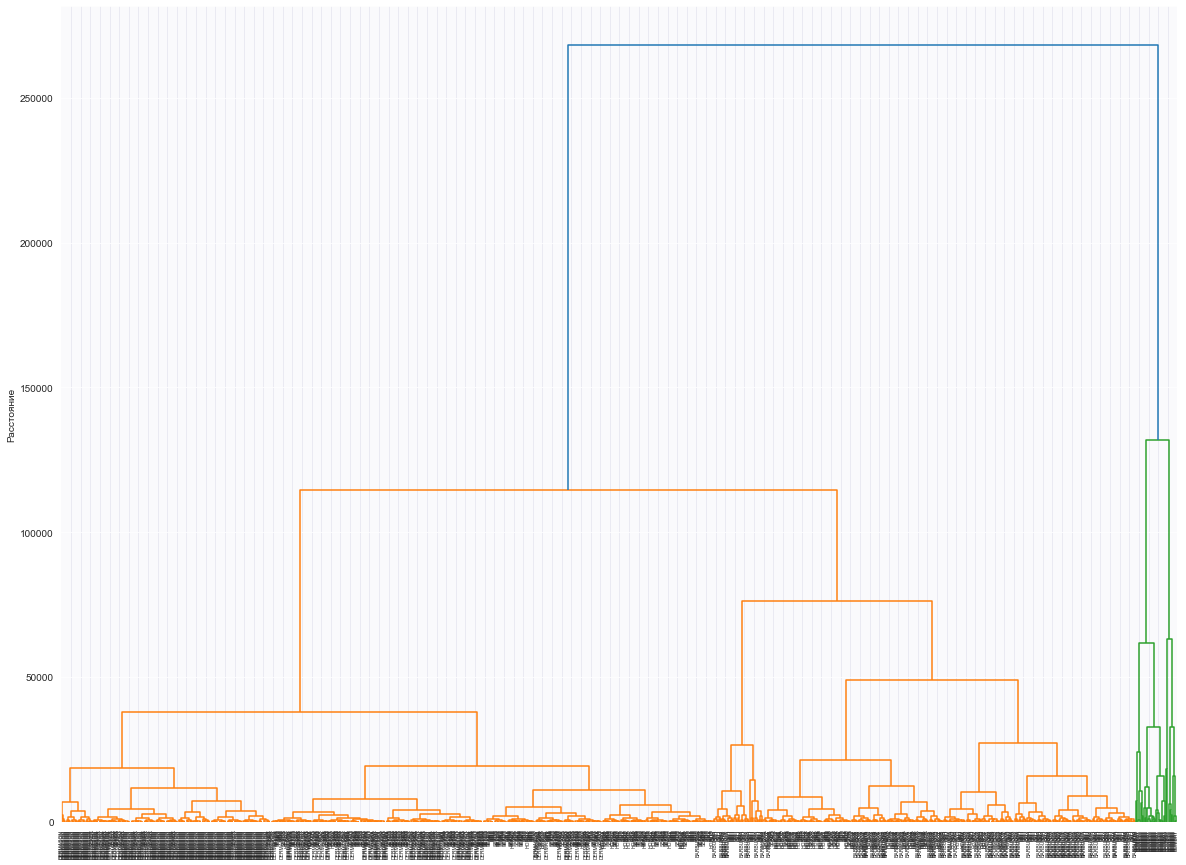

In [14]:
fig, ax = plt.subplots(figsize=(20, 15))
dendrogram(linkage(clasterization_df, method="complete"), labels=dry_bean_df_sample["Class"].tolist(), ax=ax)
ax.set_ylabel("Расстояние")
plt.xticks(rotation=90)
plt.show()

*2 На том же датасете выподните кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)*

In [15]:
n_clusters = len(fac_labels[1])
k_means = KMeans(n_clusters=n_clusters, max_iter=100).fit(clasterization_df)

In [16]:
get_metrics(clasterization_df, fac_labels[0], k_means)

{'ARI': 0.3828106771452881,
 'AMI': 0.514319964374219,
 'Homogeneity': 0.48914637427995594,
 'Completeness': 0.554173292947656,
 'V-measure': 0.5196333692979114,
 'Silhouette': 0.5482806672540673}

*3 Выполните оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию выполните, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: `Adjusted Rand Index (ARI)`, `Adjusted Mutual Information (AMI)`, `Гомогенность`, `полнота`, `V-мера`.*

In [21]:
k_means_params = {
    "n_clusters": range(2, 11),
    "init": ["k-means++", "random"],
    "max_iter": range(1, 501, 50),
    "algorithm": ["auto", "full", "elkan"],
}
gcv = GridSearchCV(estimator=KMeans(), param_grid=k_means_params, scoring="homogeneity_score")

In [22]:
gcv.fit(clasterization_df, fac_labels[0])
gcv.best_estimator_

KMeans(init='random', max_iter=51, n_clusters=10)

In [23]:
best_k_means = gcv.best_estimator_

In [24]:
get_metrics(clasterization_df, fac_labels[0], best_k_means)

{'ARI': 0.34608976135453057,
 'AMI': 0.5063621352089452,
 'Homogeneity': 0.5326456394623538,
 'Completeness': 0.49619172266828787,
 'V-measure': 0.5137728607935547,
 'Silhouette': 0.5440392446176031}

*4 Используя алгоритм/модель из п. 2 выполните оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)*

In [34]:
evaluations = []
for n_cluster in tqdm.tqdm(range(2, 101)):
    result = {}
    result["clusters"] = n_cluster
    k_means_model = KMeans(n_clusters=n_cluster)
    k_means_model.fit(clasterization_df)
    result["silhouette_score"] = silhouette_score(clasterization_df, k_means_model.labels_)
    evaluations.append(result)

100%|██████████| 99/99 [00:19<00:00,  5.08it/s]


In [35]:
evaluations_df = pd.DataFrame(data=evaluations)

<AxesSubplot:xlabel='clusters'>

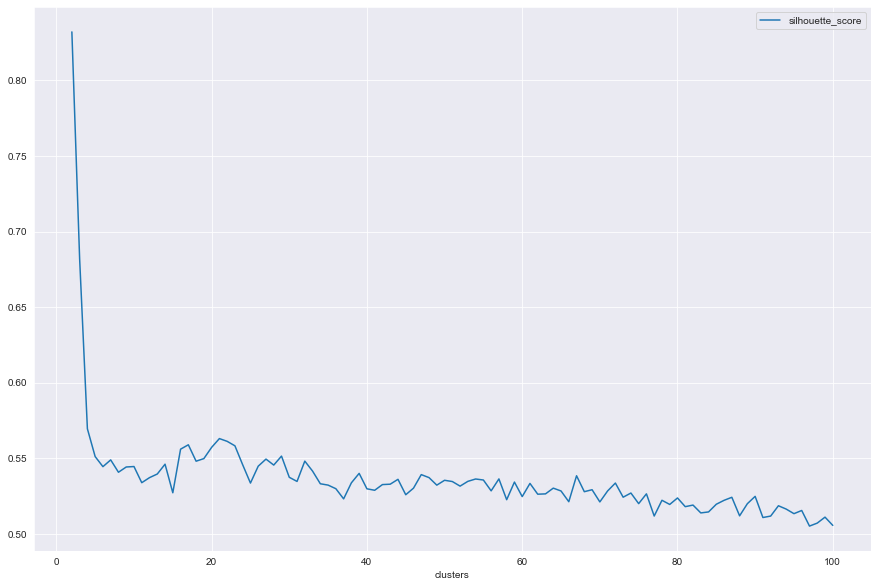

In [41]:
evaluations_df.plot(x="clusters", y="silhouette_score", figsize=(15, 10))

In [46]:
evaluations_df[evaluations_df["clusters"].between(20, 30)]

,clusters,silhouette_score
18,20,0.557359
19,21,0.563154
20,22,0.561335
21,23,0.558372
22,24,0.545827
23,25,0.533745
24,26,0.544901
25,27,0.549593
26,28,0.545639
27,29,0.551572


Как можно видеть из графика при количестве кластеров *21* произошел перелом (появился "локоть"). Далее значение силуэта пошло на спад. Следовательно, оптимальным значением количества кластеров луччше выбрать 21

Как считаются нужные нам метрики:

`ARI`: metrics.adjusted_rand_score(y, algo.labels_),

`AMI`: metrics.adjusted_mutual_info_score(y, algo.labels_),

`Homogenity`: metrics.homogeneity_score(y, algo.labels_),

`Completeness`: metrics.completeness_score(y, algo.labels_),

`V-measure`: metrics.v_measure_score(y, algo.labels_),

`Silhouette`: metrics.silhouette_score(X, algo.labels_)
